In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load the dataset
df = pd.read_csv("covid_19_data.csv")

In [11]:
# Basic Data Cleaning
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.rename(columns={'ObservationDate': 'Date', 'Country/Region': 'Country', 'Province/State': 'Province'}, inplace=True)
df.fillna({'Province': 'Unknown'}, inplace=True)

In [12]:
# Filter for India
india_df = df[df['Country'] == 'India']

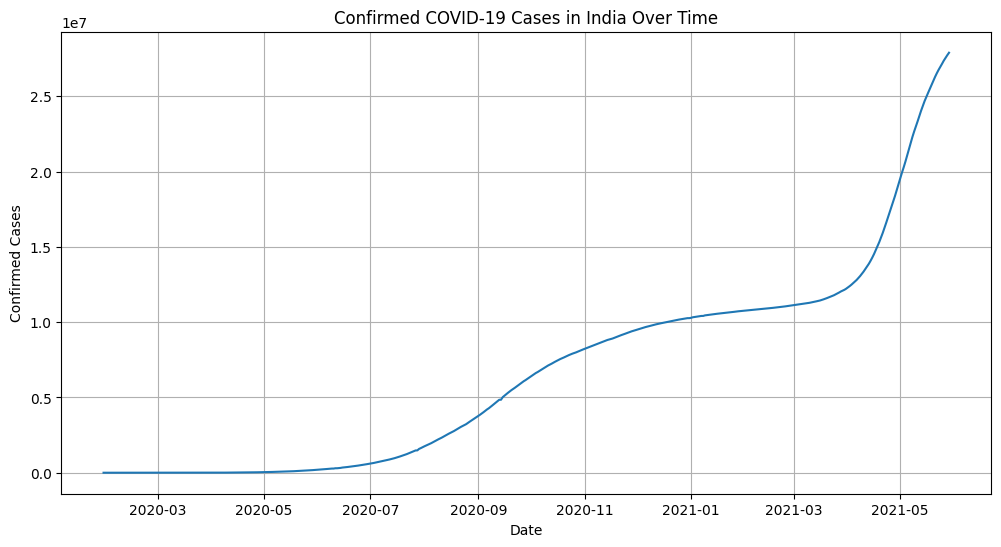

In [13]:
# 1. Global Confirmed Cases Over Time (India Specific)
india_cases = india_df.groupby('Date')['Confirmed'].sum()
plt.figure(figsize=(12, 6))
plt.plot(india_cases)
plt.title("Confirmed COVID-19 Cases in India Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()

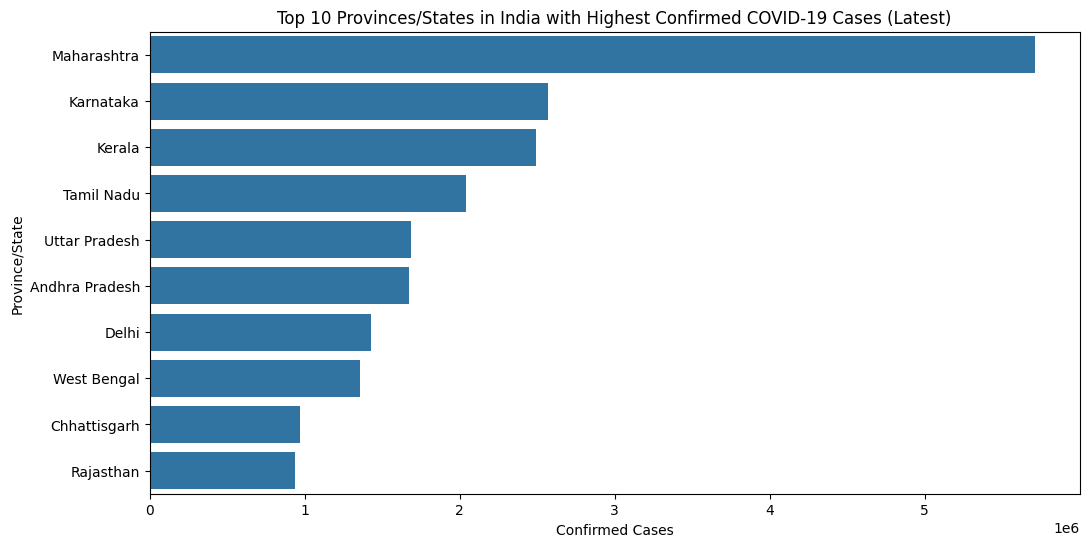

In [14]:
# 2. Top Provinces/States in India (Latest Data)
latest_india_data = india_df[india_df['Date'] == india_df['Date'].max()]
top_provinces = latest_india_data.groupby('Province')['Confirmed'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Province', data=top_provinces)
plt.title("Top 10 Provinces/States in India with Highest Confirmed COVID-19 Cases (Latest)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Province/State")
plt.show()

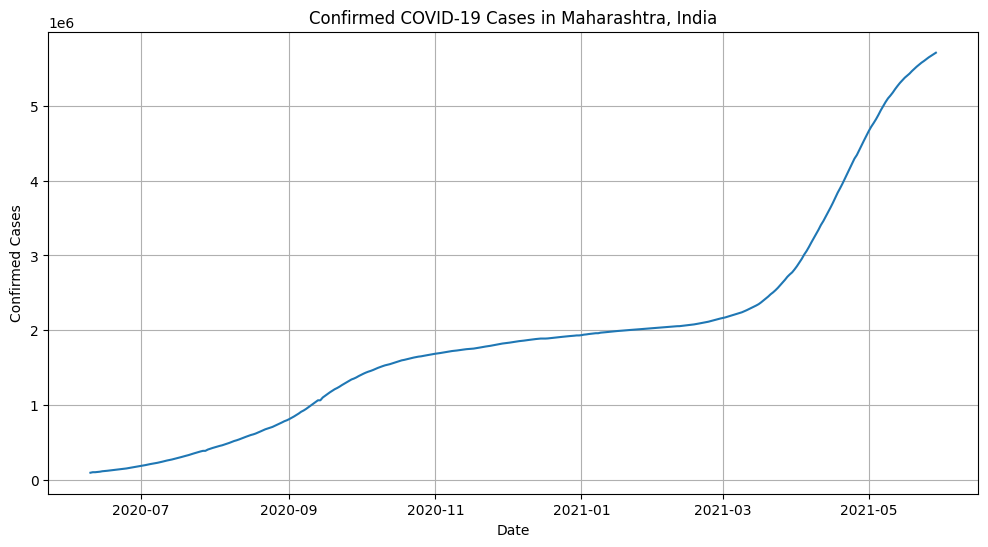

In [15]:
# 3. Confirmed Cases in a Specific Province/State (e.g., "Maharashtra")
province = "Maharashtra"
maharashtra_data = india_df[india_df['Province'] == province]
province_cases = maharashtra_data.groupby('Date')['Confirmed'].sum()
plt.figure(figsize=(12, 6))
plt.plot(province_cases)
plt.title(f"Confirmed COVID-19 Cases in {province}, India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()

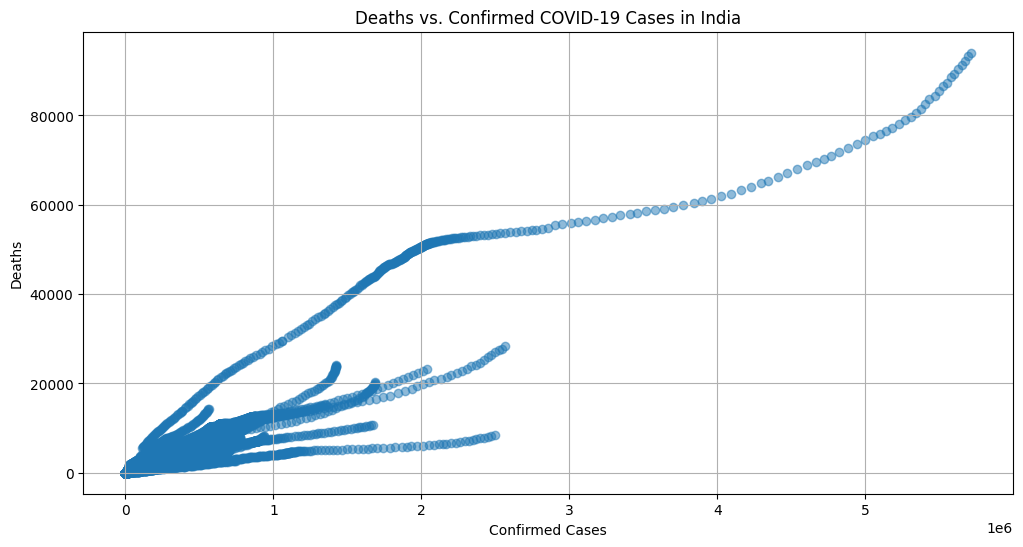

In [16]:
# 4. Deaths vs. Confirmed Cases (Scatter Plot - India)
plt.figure(figsize=(12, 6))
plt.scatter(india_df['Confirmed'], india_df['Deaths'], alpha=0.5)
plt.title("Deaths vs. Confirmed COVID-19 Cases in India")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()

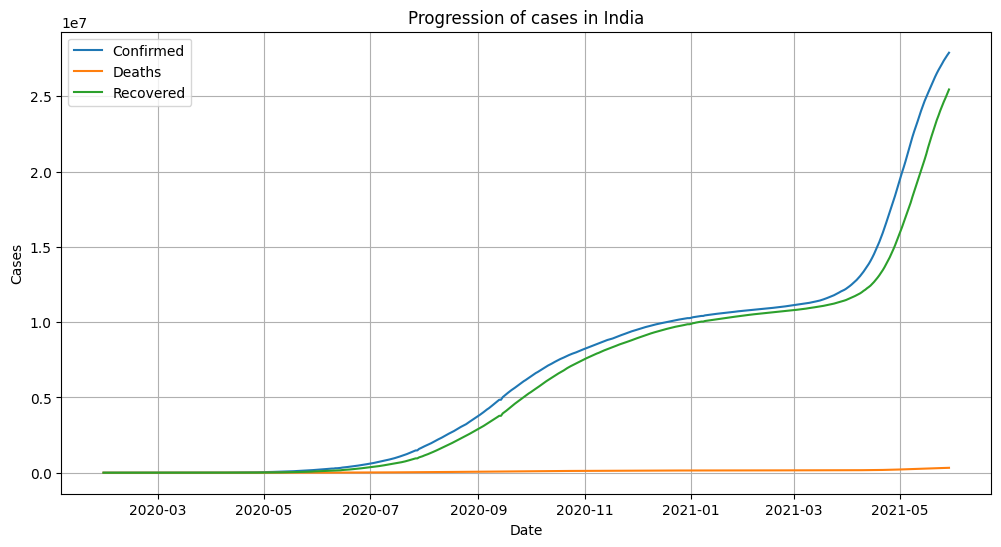

In [17]:
# 5. Progression of cases in India.
india_progression = india_df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(india_progression['Date'], india_progression['Confirmed'], label = "Confirmed")
plt.plot(india_progression['Date'], india_progression['Deaths'], label = "Deaths")
plt.plot(india_progression['Date'], india_progression['Recovered'], label = "Recovered")
plt.title("Progression of cases in India")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Conclusion
print("\n--- Conclusion ---")
print("This analysis provides a visual overview of the COVID-19 situation in India, using data from the early stages of the pandemic.")
print("Key findings include:")
print("- The progression of confirmed cases in India over time, showing the waves of infection.")
print("- The identification of the provinces/states most affected by the virus.")
print("- The trend of confirmed cases in Maharashtra, a highly impacted region.")
print("- The relationship between confirmed cases and deaths, showing the severity of the virus.")
print("- The overall progression of confirmed, death and recovered cases in India.")
print("Further analysis could delve deeper into regional variations, the impact of interventions, and time series forecasting.")
print("It is important to remember that this dataset represents the early stages of the pandemic, and that the situation evolved significantly over time.")


--- Conclusion ---
This analysis provides a visual overview of the COVID-19 situation in India, using data from the early stages of the pandemic.
Key findings include:
- The progression of confirmed cases in India over time, showing the waves of infection.
- The identification of the provinces/states most affected by the virus.
- The trend of confirmed cases in Maharashtra, a highly impacted region.
- The relationship between confirmed cases and deaths, showing the severity of the virus.
- The overall progression of confirmed, death and recovered cases in India.
Further analysis could delve deeper into regional variations, the impact of interventions, and time series forecasting.
It is important to remember that this dataset represents the early stages of the pandemic, and that the situation evolved significantly over time.
